# Maps Data

In this notebook, we use the [aerovalAPI](api.aeroval.met.no) in order to fetch the co-located obs/mod data used for plotting the online maps.

In [1]:
import pandas as pd
import requests

# map aerovalAPI entrypoint
url = 'https://api.aeroval.met.no/api/0.2.1/map/{project}/{experiment}/{network}/{obsvar}/{layer}/{model}/{modvar}/{time}'

In [2]:
# parameters
project = 'cams2-82'
experiment = 'IFS'
network = 'AeronetL1.5-d'
obsvar = 'od550aer'
layer = 'Column'
model = 'IFS-OSUITE'
modvar = 'od550aer'
time = '2013-2024'

In [3]:
# Format the URL with the actual parameters
formatted_url = url.format(
    project=project,
    experiment=experiment,
    network=network,
    obsvar=obsvar,
    layer=layer,
    model=model,
    modvar=modvar,
    time=time
)
print(formatted_url)

https://api.aeroval.met.no/api/0.2.1/map/cams2-82/IFS/AeronetL1.5-d/od550aer/Column/IFS-OSUITE/od550aer/2013-2024


In [4]:
# Make the GET request to fetch the JSON data
response = requests.get(formatted_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')
    
# convert data to a DataFrame
df = pd.json_normalize(data, sep='_')
df.head()

,station_name,latitude,longitude,altitude,region,daily_2013-2024-all_totnum,daily_2013-2024-all_weighted,daily_2013-2024-all_num_valid,daily_2013-2024-all_refdata_mean,daily_2013-2024-all_refdata_std,...,monthly_2013-2024-SON_data_std,monthly_2013-2024-SON_rms,monthly_2013-2024-SON_nmb,monthly_2013-2024-SON_mnmb,monthly_2013-2024-SON_mb,monthly_2013-2024-SON_mab,monthly_2013-2024-SON_fge,monthly_2013-2024-SON_R,monthly_2013-2024-SON_R_spearman,monthly_2013-2024-SON_R_kendall
0,AAQ10_MY_Banting,2.81664,101.62288,5.0,"[SE Asia, ALL]",4383.0,0.0,88.0,0.38293,0.22816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AAQ12_Kx_Xiaoliuqiu,22.33639,120.36847,47.0,"[ALL, Oceans]",4383.0,0.0,87.0,0.37128,0.21695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAQ13_Kx_Wanluan,22.57917,120.57455,22.0,"[SE Asia, ALL]",4383.0,0.0,97.0,0.49241,0.30991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAQ1_SK_Osan,37.08722,127.02570,34.0,"[ALL, E Asia]",4383.0,0.0,35.0,0.33975,0.22749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AAQ2_SK_Suwon,37.26110,126.99280,68.0,"[ALL, E Asia]",4383.0,0.0,80.0,0.35326,0.20364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### map plotting function

In [5]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import Normalize, ListedColormap
import numpy as np

def plot_map(df, column, colormap='viridis', vmin=0, vmax=0.5):
    # Create a figure and an axis with Cartopy's PlateCarree projection
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

    # Add geographical features
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND)

    # Normalize the data values to range between vmin and vmax
    norm = Normalize(vmin=vmin, vmax=vmax)

    # Choose a colormap
    viridis = plt.get_cmap(colormap, 10)
    cmap = ListedColormap(viridis(np.linspace(0, 1, 10)))

    # Plot each data point
    for index, row in df.iterrows():
        color = cmap(norm(row[column]))
        ax.plot(row['longitude'], row['latitude'], marker='o', color=color, markersize=4, transform=ccrs.PlateCarree())

    # Add a colorbar
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', pad=0.05, aspect=50)
    cbar.set_label(f'{statistic}')

    # Add a title
    ax.set_title(f'{modvar} - {time} ({season})', weight='bold')


    # Show the plot
    plt.show()


### plot observation mean

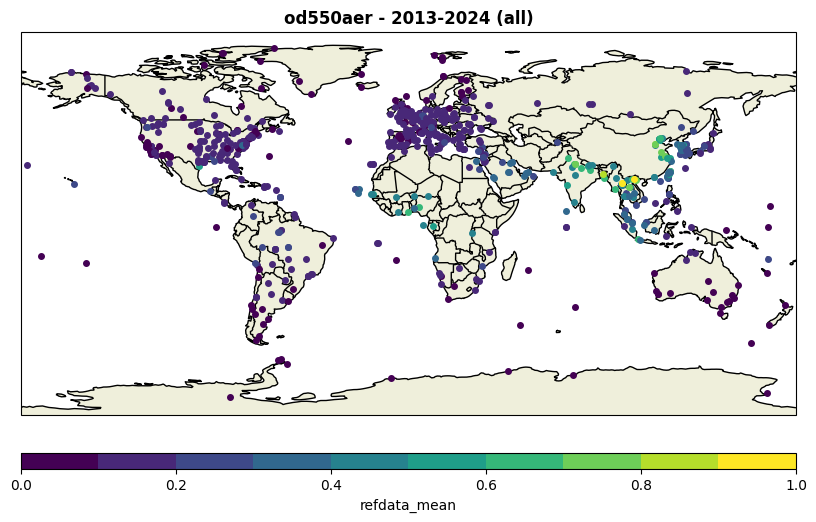

In [6]:
# select relevant column
frequency = 'daily'
season = 'all'
statistic = 'refdata_mean'
column = f'{frequency}_{time}-{season}_{statistic}'

plot_map(df, column, colormap='viridis', vmin=0.0, vmax=1.0)

### plot model mean

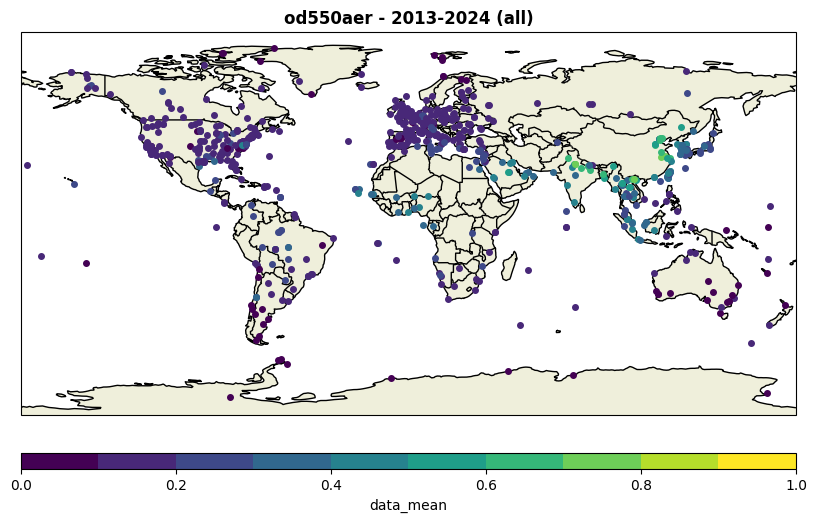

In [7]:
# select relevant column
frequency = 'daily'
season = 'all'
statistic = 'data_mean'
column = f'{frequency}_{time}-{season}_{statistic}'

plot_map(df, column, colormap='viridis', vmin=0.0, vmax=1.0)

### plot the normalized mean bias

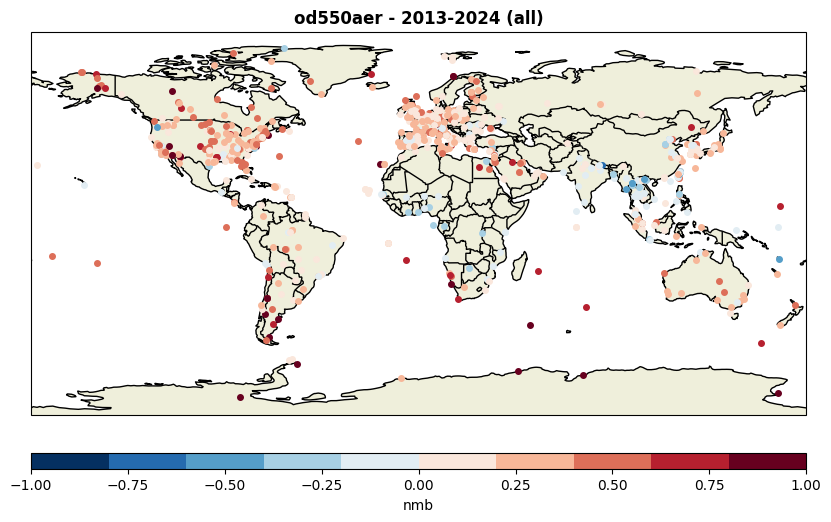

In [8]:
# select relevant column
frequency = 'daily'
season = 'all'
statistic = 'nmb'
column = f'{frequency}_{time}-{season}_{statistic}'

plot_map(df, column, colormap='RdBu_r', vmin=-1, vmax=1)

## What is the performance of the IFS with respect to Dust and Sea-Salt?

Let's select two regions where those species are dominant: 'North Africa' and 'Oceans'.

In [9]:
# DataFrame sub-selection
nmb_column = f'{frequency}_{time}-{season}_nmb'
R_column = f'{frequency}_{time}-{season}_R'

nmb_df = df[[nmb_column]]
R_df = df[[R_column]]

In [10]:
# remove ALL from regions and select first region
def extract_uregion(regions):
    if (len(regions)>1):
        regions.remove('ALL')
    if (len(regions)>0):
        return regions[0]

# Apply the function to create a new column 'uregion'
df['uregion'] = df['region'].apply(extract_uregion)
df.head()

,station_name,latitude,longitude,altitude,region,daily_2013-2024-all_totnum,daily_2013-2024-all_weighted,daily_2013-2024-all_num_valid,daily_2013-2024-all_refdata_mean,daily_2013-2024-all_refdata_std,...,monthly_2013-2024-SON_rms,monthly_2013-2024-SON_nmb,monthly_2013-2024-SON_mnmb,monthly_2013-2024-SON_mb,monthly_2013-2024-SON_mab,monthly_2013-2024-SON_fge,monthly_2013-2024-SON_R,monthly_2013-2024-SON_R_spearman,monthly_2013-2024-SON_R_kendall,uregion
0,AAQ10_MY_Banting,2.81664,101.62288,5.0,[SE Asia],4383.0,0.0,88.0,0.38293,0.22816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE Asia
1,AAQ12_Kx_Xiaoliuqiu,22.33639,120.36847,47.0,[Oceans],4383.0,0.0,87.0,0.37128,0.21695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Oceans
2,AAQ13_Kx_Wanluan,22.57917,120.57455,22.0,[SE Asia],4383.0,0.0,97.0,0.49241,0.30991,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SE Asia
3,AAQ1_SK_Osan,37.08722,127.02570,34.0,[E Asia],4383.0,0.0,35.0,0.33975,0.22749,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E Asia
4,AAQ2_SK_Suwon,37.26110,126.99280,68.0,[E Asia],4383.0,0.0,80.0,0.35326,0.20364,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E Asia


In [11]:
sub_df = df[df['uregion'].isin(['N Africa', 'Oceans'])]

Text(0, 1, 'Perfect Score')

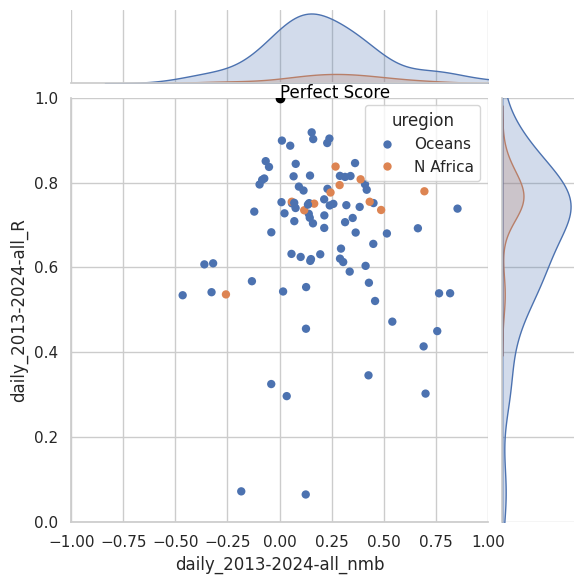

In [12]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.jointplot(
    data=sub_df,
    x=nmb_column, y=R_column,
    hue="uregion",
    sizes=(1, 8), linewidth=0,
    kind = 'scatter',
    xlim = [-1,1],
    ylim = [0,1]
)
plt.scatter(0, 1, color='black')
plt.text(0, 1, 'Perfect Score', color='black')
